Assignment 1

Name: Yatin Arora

Roll no.: 102303935

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("data.xlsx")
df

,Fund Name,P1,P2,P3,P4,P5
0,M1,0.84,0.71,6.7,42.1,12.59
1,M2,0.91,0.83,7.0,31.7,10.11
2,M3,0.79,0.62,4.8,46.7,13.23
3,M4,0.78,0.61,6.4,42.4,12.55
4,M5,0.94,0.88,3.6,62.2,16.91
5,M6,0.88,0.77,6.5,51.5,14.91
6,M7,0.66,0.44,5.3,48.9,13.83
7,M8,0.93,0.86,3.4,37.0,10.55


In [9]:
weights = np.array([1,1,1,1,2])
impacts = ['+', '+', '-', '+','+']

In [10]:
data = df.iloc[:, 1:]

norm = np.sqrt((data**2).sum())
normalized = data/norm

weighted = normalized * weights
ideal_best = []
ideal_worst = []

for i in range(len(weights)):
  if impacts == '+':
    ideal_best.append(weighted.iloc[:, i].max())
    ideal_worst.append(weighted.iloc[:, i].min())
  else:
    ideal_best.append(weighted.iloc[:, i].min())
    ideal_worst.append(weighted.iloc[:, i].max())

ideal_best = np.array(ideal_best)
ideal_worst = np.array(ideal_worst)

d_best = np.sqrt(((weighted-ideal_best)**2).sum(axis=1))
d_worst = np.sqrt(((weighted-ideal_worst)**2).sum(axis=1))

df['TOPSIS Score'] = d_worst/(d_best+d_worst)
df['Rank'] = df['TOPSIS Score'].rank(ascending=False)
df



,Fund Name,P1,P2,P3,P4,P5,TOPSIS Score,Rank
0,M1,0.84,0.71,6.7,42.1,12.59,0.494322,6.0
1,M2,0.91,0.83,7.0,31.7,10.11,0.580145,2.0
2,M3,0.79,0.62,4.8,46.7,13.23,0.554296,3.0
3,M4,0.78,0.61,6.4,42.4,12.55,0.547229,5.0
4,M5,0.94,0.88,3.6,62.2,16.91,0.301392,7.0
5,M6,0.88,0.77,6.5,51.5,14.91,0.272618,8.0
6,M7,0.66,0.44,5.3,48.9,13.83,0.552220,4.0
7,M8,0.93,0.86,3.4,37.0,10.55,0.655253,1.0


In [11]:
df.to_csv("data_102303935.csv", index = False)
files.download("data_102303935.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

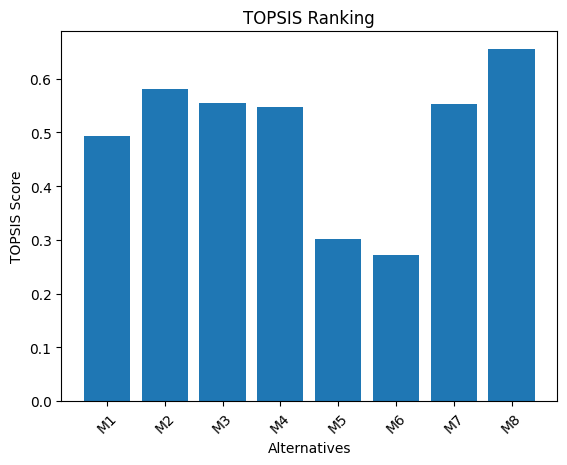

In [14]:
plt.figure()
plt.bar(df.iloc[:, 0], df['TOPSIS Score'])
plt.xlabel("Alternatives")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS Ranking")
plt.xticks(rotation=45)
plt.show()
